## picca_xcf.py

$z_{\rm{ref}}$ : 

parser.add_argument('--z-ref', type=float, default=2.25, required=False,
        help='Reference redshift')

$\alpha$:

parser.add_argument('--z-evol-del', type=float, default=2.9, required=False,
        help='Exponent of the redshift evolution of the delta field')

parser.add_argument('--z-evol-obj', type=float, default=1., required=False,
        help='Exponent of the redshift evolution of the object field')
        
weight:

$$w_i = (\frac{1+z}{1+z_{\rm{ref}}})^{\alpha -1}$$



In [57]:
import astropy.io.fits as fits

out = fits.open('out.fits')
we = out[2].data['WE']
cor = np.sum(we*out[2].data['DA'],axis=0)
cor /= we.sum(0)


In [64]:
rp = out[1].data['RP']
rt = out[1].data['RT']
nb = out[1].data['NB']

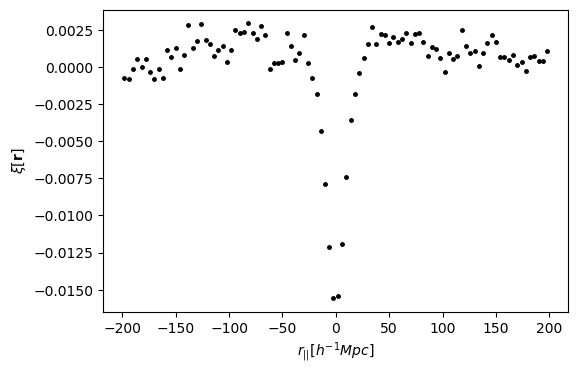

In [89]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import scipy.interpolate
import numpy as np

nbin = 100
width = len(cor)//nbin
bin_cor = []
bin_rp = []
for i in range(nbin):
    bin_cor.append(np.nanmean(cor[i*width:(i+1)*width]))
    bin_rp.append(np.nanmean(rp[i*width:(i+1)*width]))
    
f = plt.figure(dpi=100)    
plt.plot(bin_rp,bin_cor,'.',c='k',ms=5)
plt.xlabel(r'$r_{||} [h^{-1}Mpc]$')
plt.ylabel(r'$\xi[{\bf r}]$')
plt.show()